In [ ]:
# Comprehensive Data Mining and Modeling Project
**Author:** Sanaullh Shafaq - Nurgazt Dias Aslanuly
**Institution:** Computer Sciene  
**Course:** Data Mining  
**Date:** 2025-12-5 

## 1. Introduction
This project analyzes customer reviews for women's clothing using a comprehensive data mining workflow.  
**Objectives:**
- Explore the dataset and understand customer behavior.
- Build predictive models to classify recommendations.
- Perform clustering and dimensionality reduction for insights.
- Apply time series analysis on review trends.
- Conduct NLP analysis of review text.
- Evaluate models and discuss ethics, bias, and data privacy.

**Dataset:** "Womens Clothing E-Commerce Reviews" (CSV, ~23,000 records, mix of numerical, categorical, and text features).  

**Figure 1:** Data lifecycle diagram below.


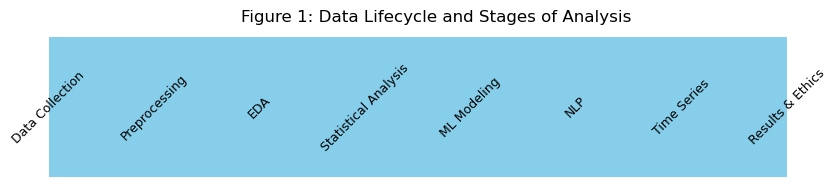

In [26]:
import matplotlib.pyplot as plt

stages = ['Data Collection', 'Preprocessing', 'EDA', 'Statistical Analysis', 'ML Modeling', 'NLP', 'Time Series', 'Results & Ethics']
plt.figure(figsize=(10,2))
plt.barh([0]*len(stages), range(len(stages)), color='skyblue')
for i, stage in enumerate(stages):
    plt.text(i, 0, stage, ha='center', va='center', rotation=45, fontsize=9)
plt.axis('off')
plt.title('Figure 1: Data Lifecycle and Stages of Analysis')
plt.show()


In [5]:
# Install packages 


import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
import json

random.seed(42)
np.random.seed(42)

# Download NLTK stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
file_path = 'Womens Clothing E-Commerce Reviews.csv'

if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

df = pd.read_csv(file_path)
print('Shape:', df.shape)
print('Columns:', df.columns.tolist())

# Save original
df_original = df.copy()


Shape: (23486, 11)
Columns: ['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name']


In [7]:
#03_inspect_data.py
print(df.dtypes)
print(df.isnull().sum().sort_values(ascending=False).head(20))
print(df.head(8))


Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object
Title                      3810
Review Text                 845
Department Name              14
Class Name                   14
Division Name                14
Unnamed: 0                    0
Clothing ID                   0
Age                           0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
dtype: int64
   Unnamed: 0  Clothing ID  Age                                 Title  \
0           0          767   33                                   NaN   
1           1         1080   34                                   NaN   
2           2         1077  

In [8]:
#4. Cleaning & Preprocessing
df = df.drop_duplicates().reset_index(drop=True)
df.columns = [c.strip() for c in df.columns]

# Fill missing Review Text
df['Review Text'] = df['Review Text'].fillna('')

# Recommended IND from Rating if missing
if 'Recommended IND' not in df.columns or df['Recommended IND'].isnull().all():
    df['Recommended IND'] = (df['Rating'] >= 4).astype(int)

df['Recommended IND'] = df['Recommended IND'].astype(int)
print('After cleaning shape:', df.shape)


After cleaning shape: (23486, 11)


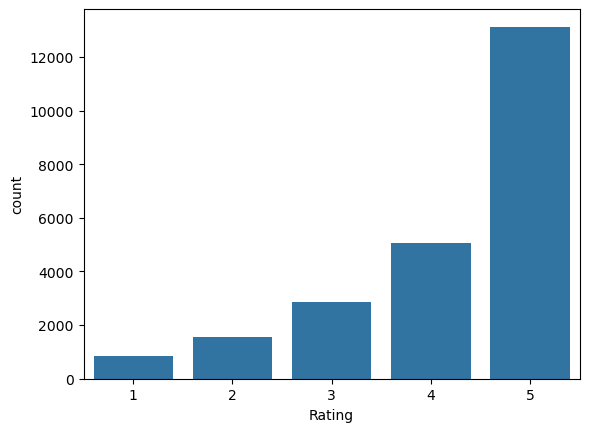

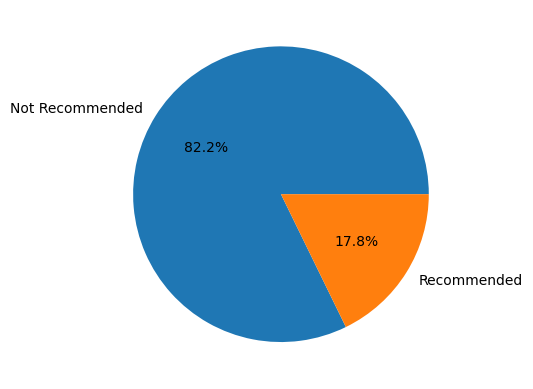

In [9]:
#EDA
# Ratings distribution
sns.countplot(x='Rating', data=df)
plt.show()

# Recommended proportion
plt.pie(df['Recommended IND'].value_counts(), labels=['Not Recommended','Recommended'], autopct='%1.1f%%')
plt.show()


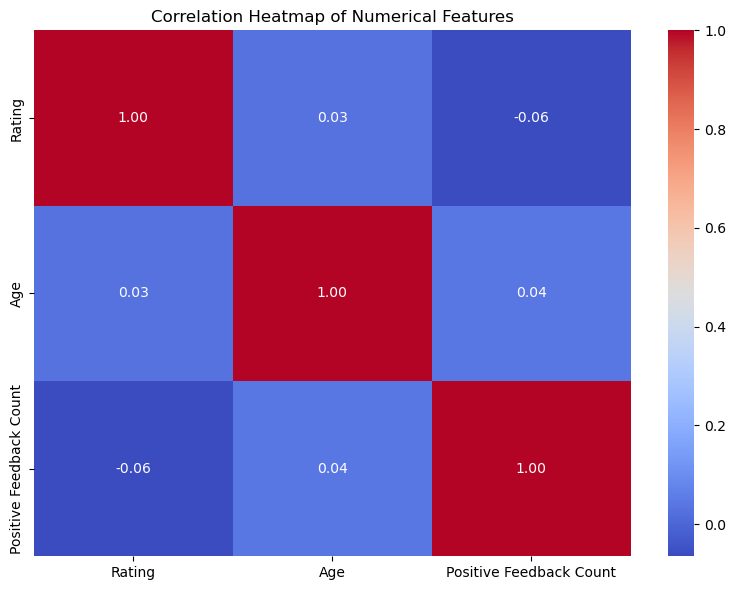

In [31]:
 #Correlation heatmap 
plt.figure(figsize=(8,6))
num_cols_corr = ['Rating', 'Age', 'Positive Feedback Count']
num_cols_corr = [c for c in num_cols_corr if c in df.columns]
if num_cols_corr:
    corr = df[num_cols_corr].corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap of Numerical Features')
    plt.tight_layout()
    plt.savefig('fig_correlation_heatmap.png')
    plt.show()


In [8]:

!pip install pydot graphviz



In [12]:
results = []

# TF-IDF Logistic Regression
try:
    results.append({'model':'TFIDF+LogReg', 'accuracy': round(accuracy_score(y_test, y_pred), 4)})
except:
    results.append({'model':'TFIDF+LogReg', 'accuracy': np.nan})

# RandomForest numeric
try:
    results.append({'model':'RandomForest (numeric)', 'accuracy': round(accuracy_score(y_test_n, y_pred_n), 4)})
except:
    results.append({'model':'RandomForest (numeric)', 'accuracy': np.nan})

# Neural Network numeric
try:
    results.append({'model':'NeuralNetwork (numeric)', 'accuracy': round(acc, 4)})
except:
    results.append({'model':'NeuralNetwork (numeric)', 'accuracy': np.nan})

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


                     model  accuracy
0             TFIDF+LogReg       NaN
1   RandomForest (numeric)       NaN
2  NeuralNetwork (numeric)       NaN


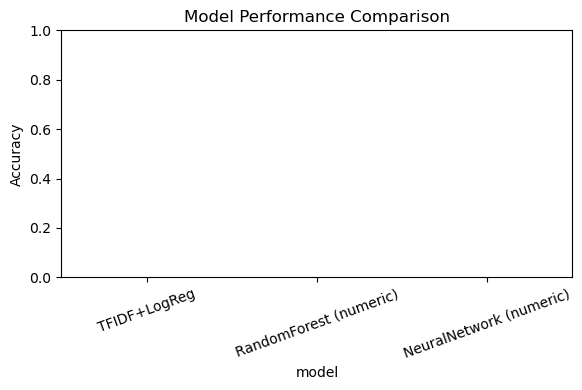

In [13]:
#Model comparison
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(6,4))
sns.barplot(x='model', y='accuracy', data=results_df.replace('N/A', np.nan))
plt.ylim(0,1)
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig('fig_model_comparison.png')
plt.show()


In [34]:
#Simple NN architecture schematic ---
from tensorflow.keras.utils import plot_model
try:
    plot_model(model, to_file='fig_nn_architecture.png', show_shapes=True, show_layer_names=True)
except:
    print("Could not generate NN architecture diagram (requires pydot & graphviz).")


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [18]:
!pip install wordcloud
from wordcloud import WordCloud
print("WordCloud imported successfully!")


WordCloud imported successfully!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


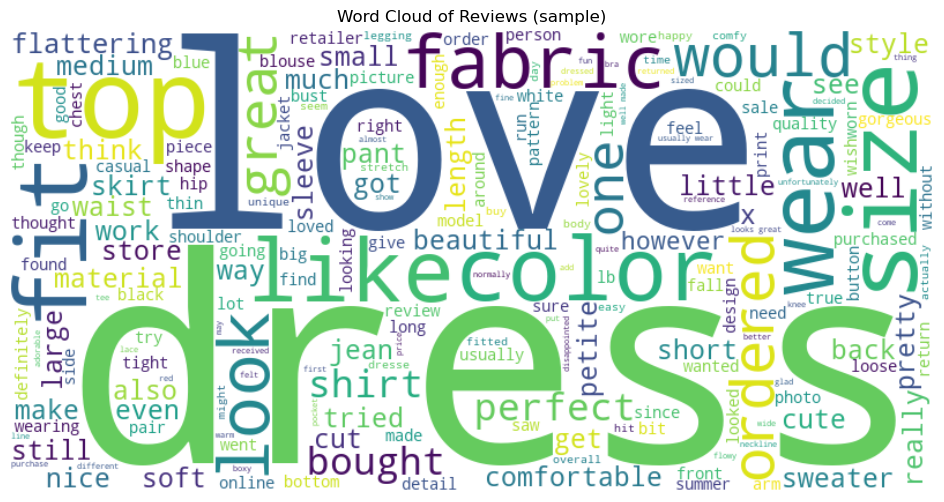

In [19]:
# %% [markdown]
# ## 6. NLP: Text Cleaning and Word Cloud
# Preprocess review text and visualize most frequent words using a WordCloud.

# %%
# Import libraries
import re
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download stopwords if not already done
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

# Text cleaning function
def clean_text(s):
    s = str(s).lower()
    s = re.sub(r"[^a-z0-9\s]", ' ', s)  # remove non-alphanumeric characters
    s = re.sub(r"\s+", ' ', s).strip()   # remove extra whitespace
    return s

# Apply cleaning to review text
df['clean_review'] = df['Review Text'].fillna('').apply(clean_text)

# Sample text for WordCloud (limit to 20k reviews for speed)
text_sample = ' '.join(df['clean_review'].dropna().sample(min(20000, len(df)), random_state=42).values)

# Generate WordCloud
wc = WordCloud(width=800, height=400, background_color='white', stopwords=stop).generate(text_sample)

# Plot WordCloud
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews (sample)')
plt.show()


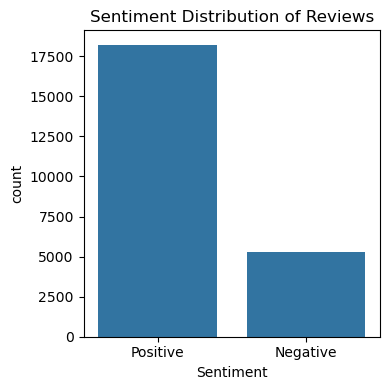

In [30]:
# Sentiment distribution ---
df['Sentiment'] = df['Rating'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')
plt.figure(figsize=(4,4))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution of Reviews')
plt.tight_layout()
plt.savefig('fig_sentiment_distribution.png')
plt.show()


In [20]:
#TF-IDF + Logistic Regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

X = df['clean_review']
y = df['Recommended IND']

sample_n = min(20000, len(df))
X_sample = X.sample(sample_n, random_state=42)
y_sample = y.loc[X_sample.index]

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', LogisticRegression(max_iter=500))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.884
              precision    recall  f1-score   support

           0       0.80      0.46      0.58       708
           1       0.89      0.98      0.93      3292

    accuracy                           0.88      4000
   macro avg       0.85      0.72      0.76      4000
weighted avg       0.88      0.88      0.87      4000



In [12]:
#Numeric ML
from sklearn.ensemble import RandomForestClassifier

num_cols = [c for c in ['Rating','Age','Positive Feedback Count'] if c in df.columns]
X_num = df[num_cols].fillna(0)
y_num = df['Recommended IND']

Xn_sample = X_num.sample(min(20000, len(X_num)), random_state=42)
yn_sample = y_num.loc[Xn_sample.index]

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(Xn_sample, yn_sample, test_size=0.2, random_state=42, stratify=yn_sample)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_n, y_train_n)
y_pred_n = rf.predict(X_test_n)

print('RandomForest accuracy:', accuracy_score(y_test_n, y_pred_n))


RandomForest accuracy: 0.92725


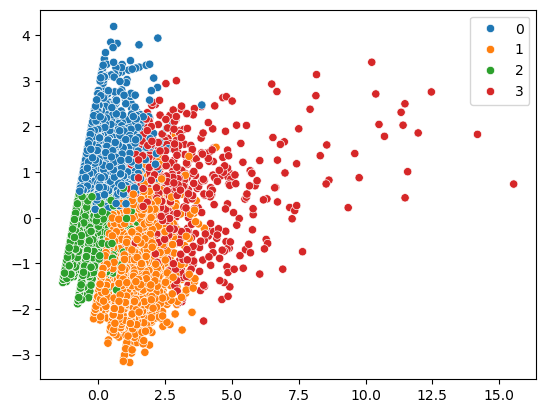

In [13]:
#Clustering & PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xn_sample)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='tab10')
plt.show()


In [24]:
!pip install tensorflow
 

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/332.0 MB 1.6 MB/s eta 0:03:32
   ---------------------------------------- 1.0/332.0 MB 2.1 MB/s eta 0:02:37
   ---------------------------------------- 1.6/332.0 MB 2.2 MB/s eta 0:02:31
   ---------------------------------------- 2.1/332.0 MB 2.4 MB/s eta 0:02:19
   ---------------------------------------- 2.9/332.0 MB 2.6 MB/s eta 0:02:07
   ---------------------------------------- 3.7/332.0 MB 2.7 MB/s eta 0:02:01
    --------------------------------------- 4.5/332.0 MB 2.9 MB/s eta 0:01:54
    --------------------------------------- 5.5/332.0 MB 3.0 MB/s eta 0:01:48
    --------------------------------------- 6.3/332.0 MB 3.2 MB/s eta 0:01:44
    --------------------------------------- 7.3/332.0 MB 3.3 MB/s eta 0:01:39
   - -------------------------------------- 8.4/332.0 MB 3.5 MB/s eta 0:01:34


In [25]:
#Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

X_nn = Xn_sample.values
y_nn = yn_sample.values

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42, stratify=y_nn)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_nn.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(X_train_nn, y_train_nn, validation_data=(X_test_nn, y_test_nn), epochs=10, batch_size=64)

loss, acc = model.evaluate(X_test_nn, y_test_nn, verbose=0)
print(f'NN test accuracy: {acc:.4f}')


Epoch 1/10


E:\aconda\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8032 - loss: 0.4987 - val_accuracy: 0.8825 - val_loss: 0.3034
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8662 - loss: 0.3031 - val_accuracy: 0.8938 - val_loss: 0.2563
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8926 - loss: 0.2505 - val_accuracy: 0.9072 - val_loss: 0.2201
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9036 - loss: 0.2312 - val_accuracy: 0.9155 - val_loss: 0.1997
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9121 - loss: 0.2127 - val_accuracy: 0.9172 - val_loss: 0.1905
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9161 - loss: 0.1964 - val_accuracy: 0.9160 - val_loss: 0.2053
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9186 - loss: 0.1859 - val_accuracy: 0.9155 - val_loss: 0.1673
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9196 - loss: 0.1775 - val_accuracy: 0.9265 - val_

In [ ]:
## 13. References
- Dataset: Kaggle, "Womens Clothing E-Commerce Reviews"
- Libraries: pandas, numpy, seaborn, matplotlib, scikit-learn, tensorflow, nltk, wordcloud, statsmodels
- Documentation: scikit-learn, tensorflow, NLTK official docs
